In [243]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [244]:
# LOADING THE DATASET
path_dataset = "/content/insurance.csv"
df_insurance = pd.read_csv("/content/insurance.csv")
df_insurance.info()
df_insurance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#**#1 Analisa Descriptive Statistic**


**1. Berapa rata-rata umur peserta asuransi?**

In [245]:
# RATA-RATA UMUR PESERTA ASURANSI
mean_age = df_insurance["age"].mean()
print(f'Rata-rata umur peserta asuransi adalah {mean_age:.0f} tahun.')

Rata-rata umur peserta asuransi adalah 39 tahun.


**2. Berapa rata-rata nilai BMI dari yang merokok?**

In [246]:
# RATA-RATA NILAI BMI DARI PESERTA YANG MEROKOK
df_smoker = df_insurance[df_insurance["smoker"]=="yes"]
df_nonsmoker = df_insurance[df_insurance["smoker"]=="no"]

mean_bmi_smoker = df_smoker["bmi"].mean()

print(f"Rata-rata BMI perokok adalah {mean_bmi_smoker:.2f}")

Rata-rata BMI perokok adalah 30.71


**3. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?**

In [247]:
# VARIANSI TAGIHAN PEROKOK DAN NON PEROKOK
var_charges_smoker = df_smoker["charges"].var()
var_charges_nonsmoker = df_nonsmoker["charges"].var()

print(f"Variansi tagihan perokok adalah{var_charges_smoker: .2f}")
print(f"Variansi tagihan non perokok adalah{var_charges_nonsmoker: .2f}")

Variansi tagihan perokok adalah 133207311.21
Variansi tagihan non perokok adalah 35925420.50


**4. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?**

In [248]:
# RATA_RATA UMUR PEREMPUAN DAN LAKI-LAKI YANG MEROKOK
mean_female_smoker = df_smoker [df_smoker["sex"] == "female"]["age"].mean()
mean_male_smoker = df_smoker[df_smoker["sex"] == "male"]["age"].mean()

print(f"Rata-rata umur perempuan yang merokok adalah{mean_female_smoker: .0f} tahun.")
print(f"Rata-rata umur laki-laki yang merokok adalah{mean_male_smoker: .0f} tahun.")

Rata-rata umur perempuan yang merokok adalah 39 tahun.
Rata-rata umur laki-laki yang merokok adalah 38 tahun.


**5. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non perokok?**

In [249]:
# RATA-RATA TAGIHAN PEROKOK DAN NON PEROKOK
mean_charges_smoker = df_smoker["charges"]. mean()
mean_charges_nonsmoker = df_nonsmoker["charges"]. mean()

print(f"Rata-rata tagihan perokok adalah {mean_charges_smoker: .2f}")
print(f"Rata-rata tagihan non perokok adalah {mean_charges_nonsmoker: .2f}")

Rata-rata tagihan perokok adalah  32050.23
Rata-rata tagihan non perokok adalah  8434.27


**6. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok dengan bmi >25 atau non perokok dengan bmi >25**

In [250]:
# RATA_RATA TAGIHAN PEROKOK DAN NON PEROKOK DENGAN BMI >25
mean_charges_smoker_bmi25 = df_smoker [df_smoker["bmi"] >= 25]["charges"].mean()
mean_charges_nonsmoker_bmi25 = df_nonsmoker [df_nonsmoker["bmi"] >= 25]["charges"].mean()

print(f"Rata-rata tagihan perokok dengan BMI >25 adalah{mean_charges_smoker_bmi25: .2f}")
print(f"Rata-rata tagihan non perokok dengan BMI >25 adalah{mean_charges_nonsmoker_bmi25: .2f}")


Rata-rata tagihan perokok dengan BMI >25 adalah 35116.91
Rata-rata tagihan non perokok dengan BMI >25 adalah 8633.96


#**#2 Analisa Variabel Diskrit**

**1. Gender mana yang memiliki tagihan paling tinggi?**

In [251]:
# GENDER YANG MEMILIKI TAGIHAN PALING TINGGI
mean_charges_male = df_insurance[df_insurance["sex"] == "male"]["charges"].mean()
mean_charges_female = df_insurance[df_insurance["sex"] == "female"]["charges"].mean()

print(f'Rata-rata tagihan pada peserta laki-laki adalah {mean_charges_male:.2f}')
print(f'Rata-rata tagihan pada peserta perempuan adalah {mean_charges_female:.2f}')

Rata-rata tagihan pada peserta laki-laki adalah 13956.75
Rata-rata tagihan pada peserta perempuan adalah 12569.58


**3. Apakah setiap region memiliki proporsi data banyak orang yang sama?**

In [252]:
# N MASING-MASING REGION
count_region = df_insurance["region"].value_counts()
print(count_region)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [253]:
# PROPORSI DATA BANYAKNYA ORANG DI TIAP REGION
southeast = 364
southwest = 325
northwest = 325
northeast = 324

total_region = southeast + southwest + northwest + northeast

p_se = southeast/total_region
print(f'Proporsi banyaknya orang di southeast adalah = {p_se :.2f}')
p_sw = southwest/total_region
print(f'Proporsi banyaknya orang di southwest adalah = {p_sw :.2f}')
p_nw = northwest/total_region
print(f'Proporsi banyaknya orang di northwest adalah = {p_nw :.2f}')
p_ne = northeast/total_region
print(f'Proporsi banyaknya orang di northeast adalah = {p_ne :.2f}')

Proporsi banyaknya orang di southeast adalah = 0.27
Proporsi banyaknya orang di southwest adalah = 0.24
Proporsi banyaknya orang di northwest adalah = 0.24
Proporsi banyaknya orang di northeast adalah = 0.24


**4.  Manakah yang lebih tinggi, proporsi perokok atau non perokok?**

In [254]:
# N PEROKOK DAN NON PEROKOK
df_insurance["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [255]:
# PROPORSI DATA PEROKOK DAN NON PEROKOK
no_smoker = 1064
yes_smoker = 274

total_data = no_smoker + yes_smoker

p_no = no_smoker/total_data
print(f"Proporsi banyaknya peserta yang tidak merokok adalah = {p_no :.2f}")
p_yes = yes_smoker/total_data
print(f"Proporsi banyaknya peserta yang merokok adalah = {p_yes :.2f}")

Proporsi banyaknya peserta yang tidak merokok adalah = 0.80
Proporsi banyaknya peserta yang merokok adalah = 0.20


**5. Berapa peluang seseorang tersebut adalah perempuan, jika diketahui dia adalah perokok?**

In [256]:
# PELUANG PEREMPUAN DIKETAHUI PEROKOK
df_insurance.groupby(["sex"]).value_counts(["smoker"])

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
dtype: int64

In [257]:
female = 547 + 115
male = 517 + 159

female_smoker = 115
male_smoker = 159

p_female_smoker = female_smoker/yes_smoker
print(f"Peluang seorang perempuan diketahui dia adalah perokok = {p_female_smoker : .2f}")

Peluang seorang perempuan diketahui dia adalah perokok =  0.42


**6. Berapa peluang seseorang tersebut adalah laki-laki, jika diketahui dia adalah perokok?**

In [258]:
# PELUANG LAKI_LAKI DIKETAHUI PEROKOK
p_male_smoker = male_smoker/yes_smoker
print(f"Peluang seorang laki-laki diketahui dia adalah perokok = {p_male_smoker : .2f}")

Peluang seorang laki-laki diketahui dia adalah perokok =  0.58


#**#3 Analisa Variabel Kontinu**


**1. Manakah yang paling mungkin terjadi,**

*   Seseorang dengan BMI  di atas 25 dan mendapat tagihan di atas 16.700
*   Seseorang dengan BMI di bawah 25 dan mendapat tagihan di atas 16.700



In [259]:
# N BMI>25
bmi_up25 = df_insurance[(df_insurance.bmi>25)]
print(bmi_up25)

      age     sex    bmi  children smoker     region     charges
0      19  female  27.90         0    yes  southwest  16884.9240
1      18    male  33.77         1     no  southeast   1725.5523
2      28    male  33.00         3     no  southeast   4449.4620
4      32    male  28.88         0     no  northwest   3866.8552
5      31  female  25.74         0     no  southeast   3756.6216
...   ...     ...    ...       ...    ...        ...         ...
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

[1091 rows x 7 columns]


In [260]:
# N BMI>25 DAN TAGIHAN>16.700
bmi_up25_charges_up16700 = df_insurance[(df_insurance.bmi>25)&(df_insurance.charges>16700)]
print(bmi_up25_charges_up16700)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
9      60  female  25.840         0     no  northwest  28923.13692
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1318   35    male  39.710         4     no  northeast  19496.71917
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[283 rows x 7 columns]


In [261]:
# PELUANG BMI >25 TAGIHAN >167.000
total_bmi_up25 = 1091
n_up25_up16700 = 283
p_up25_up16700 = n_up25_up16700/total_bmi_up25
print(f"Peluang seseorang dengan BMI>25 dan tagihan >16700 adalah {p_up25_up16700 :.2f}")

Peluang seseorang dengan BMI>25 dan tagihan >16700 adalah 0.26


In [262]:
# N BMI<25
bmi_under25 = df_insurance[(df_insurance.bmi<25)]
print(bmi_under25)

      age     sex     bmi  children smoker     region      charges
3      33    male  22.705         0     no  northwest  21984.47061
15     19    male  24.600         1     no  southwest   1837.23700
17     23    male  23.845         0     no  northeast   2395.17155
26     63  female  23.085         0     no  northeast  14451.83515
28     23    male  17.385         1     no  northwest   2775.19215
...   ...     ...     ...       ...    ...        ...          ...
1304   42    male  24.605         2    yes  northeast  21259.37795
1306   29  female  21.850         0    yes  northeast  16115.30450
1314   30  female  23.655         3    yes  northwest  18765.87545
1316   19  female  20.600         0     no  southwest   1731.67700
1328   23  female  24.225         2     no  northeast  22395.74424

[245 rows x 7 columns]


In [263]:
# N BMI<25 TAGIHAN>16.700
bmi_under25_charges_up16700 = df_insurance[(df_insurance.bmi<25)&(df_insurance.charges>16700)]
print(bmi_under25_charges_up16700)

      age     sex     bmi  children smoker     region      charges
3      33    male  22.705         0     no  northwest  21984.47061
58     53  female  22.880         1    yes  southeast  23244.79020
62     64    male  24.700         1     no  northwest  30166.61817
69     28    male  23.980         3    yes  southeast  17663.14420
85     45    male  22.895         2    yes  northwest  21098.55405
98     56    male  19.950         0    yes  northeast  22412.64850
128    32  female  17.765         2    yes  northwest  32734.18630
140    34    male  22.420         2     no  northeast  27375.90478
153    42  female  23.370         0    yes  northeast  19964.74630
156    48    male  24.420         0    yes  southeast  21223.67580
219    24  female  23.210         0     no  southeast  25081.76784
224    42    male  24.640         0    yes  southeast  19515.54160
235    40  female  22.220         2    yes  southeast  19444.26580
262    52    male  24.320         3    yes  northeast  24869.8

In [264]:
# PELUANG BMI<25 TAGIHAN>16.700
total_bmi_under25 = 245
n_under25_up16700 = len(bmi_under25_charges_up16700)
p_under25_up16700 = n_under25_up16700/total_bmi_under25
print(f"Peluang seseorang dengan BMI<25 dan tagihan >16700 adalah {p_under25_up16700 :.2f}")

Peluang seseorang dengan BMI<25 dan tagihan >16700 adalah 0.21


**2. Manakah yang paling mungkin terjadi,**

*   Seorang perokok dengan BMI di atas 25 dan mendapat tagihan di atas 16.700
*   Seorang nonperokok dengan BMI di atas 25 dan mendapat tagihan di atas 16.700

In [265]:
# N PEROKOK BMI>25
smoker_up25 = df_insurance[(df_insurance.smoker == "yes")&(df_insurance.bmi>25)]
print(smoker_up25)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1308   25  female  30.200         0    yes  southwest  33900.65300
1313   19  female  34.700         2    yes  southwest  36397.57600
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[219 rows x 7 columns]


In [266]:
# N PEROKOK BMI>25 TAGIHAN>16.700
smoker_up25_up16700 = df_insurance[(df_insurance.smoker == "yes")&(df_insurance.bmi>25)&(df_insurance.charges>16700)]
print(smoker_up25_up16700)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1308   25  female  30.200         0    yes  southwest  33900.65300
1313   19  female  34.700         2    yes  southwest  36397.57600
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[215 rows x 7 columns]


In [267]:
# PELUANG PEROKOK BMI>25 TAGIHAN>16700
total_smoker_up25 = 219
n_smoker_up25_up16700 = 215
p_smoker_up25_up16700 = n_smoker_up25_up16700/total_smoker_up25
print(f"Peluang seorang perokok dengan BMI>25 dan tagihan >16700 adalah {p_smoker_up25_up16700 :.2f}")

Peluang seorang perokok dengan BMI>25 dan tagihan >16700 adalah 0.98


In [268]:
# N NONPEROKOK BMI>25
nonsmoker_up25 = df_insurance[(df_insurance.smoker == "no")&(df_insurance.bmi>25)]
print(nonsmoker_up25)

      age     sex    bmi  children smoker     region     charges
1      18    male  33.77         1     no  southeast   1725.5523
2      28    male  33.00         3     no  southeast   4449.4620
4      32    male  28.88         0     no  northwest   3866.8552
5      31  female  25.74         0     no  southeast   3756.6216
6      46  female  33.44         1     no  southeast   8240.5896
...   ...     ...    ...       ...    ...        ...         ...
1332   52  female  44.70         3     no  southwest  11411.6850
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450

[872 rows x 7 columns]


In [269]:
# N NONPEROKOK BMI>25 TAGIHAN>16.700
nonsmoker_up25_up16700 = df_insurance[(df_insurance.smoker == "no")&(df_insurance.bmi>25)&(df_insurance.charges>16700)]
print(nonsmoker_up25_up16700)

      age     sex     bmi  children smoker     region      charges
9      60  female  25.840         0     no  northwest  28923.13692
45     55    male  37.300         0     no  southwest  20630.28351
102    18  female  30.115         0     no  northeast  21344.84670
115    60    male  28.595         0     no  northeast  30259.99556
138    54  female  31.900         3     no  southeast  27322.73386
...   ...     ...     ...       ...    ...        ...          ...
1195   19  female  27.930         3     no  northwest  18838.70366
1206   59  female  34.800         2     no  southwest  36910.60803
1211   39    male  34.100         2     no  southeast  23563.01618
1258   55    male  37.715         3     no  northwest  30063.58055
1318   35    male  39.710         4     no  northeast  19496.71917

[68 rows x 7 columns]


In [270]:
# PELUANG NON PEROKOK BMI>25 TAGIHAN>16700
total_nonsmoker_up25 = 872
n_nonsmoker_up25_up16700 = 68
p_nonsmoker_up25_up16700 = n_nonsmoker_up25_up16700/total_nonsmoker_up25
print(f"Peluang seorang non perokok dengan BMI>25 dan tagihan >16700 adalah {p_nonsmoker_up25_up16700 :.2f}")

Peluang seorang non perokok dengan BMI>25 dan tagihan >16700 adalah 0.08


#**#4 Analisa Korelasi Variabel**


In [271]:
# KORELASI TAGIHAN DENGAN VARIABEL LAINNYA
correlation = df_insurance[['age','sex','bmi','children','smoker','charges']].corr(numeric_only = "True")

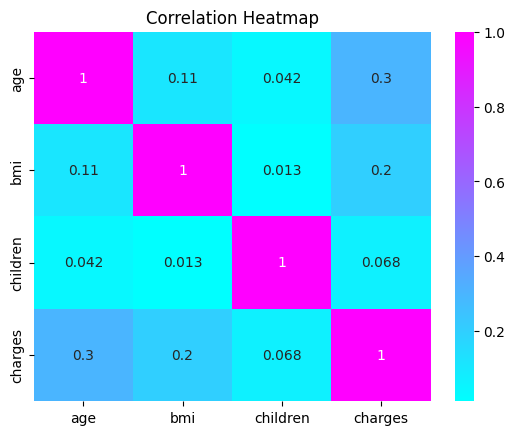

In [272]:
# VISUALISASI KORELASI DENGAN HEATMAP
sns.heatmap(correlation, annot=True, cmap='cool')
plt.title('Correlation Heatmap')

# plt.savefig("img/korelasi-heatmap.jpeg")
plt.show()

#**#5. Pengujian Hipotesis**


**1. Apakah rata-rata tagihan perokok lebih besar daripada tagihan non perokok?**

*   H1: Rata-rata tagihan perokok > rata-rata tagihan non-perokok.
*   H1: Rata-rata tagihan perokok > rata-rata tagihan non-perokok.


In [273]:
# MEMBAGI DATASET MENJADI KELOMPOK PEROKOK DAN NON PEROKOK
charges_smoker = df_smoker["charges"]
charges_nonsmoker = df_nonsmoker["charges"]

# UJI T INDEPENDEN
t_statistic, p_value = stats.ttest_ind (charges_smoker, charges_nonsmoker, alternative='greater')

# TINGKAT SIGNIFIKASI
alpha = 0.05

print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Hipotesis nol ditolak. Rata-rata tagihan perokok lebih besar daripada tagihan non-perokok.")
else:
    print("Hipotesis nol diterima. Tidak ada bukti statistik yang cukup untuk menyimpulkan bahwa rata-rata tagihan perokok lebih besar daripada tagihan non-perokok.")

t-statistic: 46.66492117272371
p-value: 4.135717921089551e-283
Hipotesis nol ditolak. Rata-rata tagihan perokok lebih besar daripada tagihan non-perokok.


**2. Apakah proporsi perokok laki-laki lebih besar dari perempuan?**

*   H0: Proporsi perokok laki-laki <= proporsi perokok perempuan.
*   H1: Proporsi perokok laki-laki > proporsi perokok perempuan.


In [274]:
# JUMLAH PEROKOK LAKI-LAKI DAN PEREMPUAN # DARI DATA DI ATAS
male_smoker = 159
female_smoker = 115

#TOTAL SMOKER
yes_smoker = male_smoker + female_smoker

# Melakukan uji proporsi
count = [male_smoker, female_smoker]
nobs = [yes_smoker, yes_smoker]
z_statistic, p_value = proportions_ztest(count, nobs, alternative='larger')

# Tingkat signifikansi
alpha = 0.05

print("z-statistic:", z_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Hipotesis nol ditolak. Proporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan.")
else:
    print("Hipotesis nol diterima. Tidak ada bukti statistik yang cukup untuk menyimpulkan bahwa proporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan.")

z-statistic: 3.759173693953749
p-value: 8.523772937514337e-05
Hipotesis nol ditolak. Proporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan.


**3. Apakah variasi tagihan kesehatan perokok dan non perokok sama?**

*   H0: Variansi tagihan kesehatan perokok = variansi tagihan kesehatan non-perokok.
*   H1: Variansi tagihan kesehatan perokok != variansi tagihan kesehatan non-perokok.

In [275]:
# MENGAMBIL DATA TAGIHAN PEROKOK DAN NON PEROKOK
charges_smoker = df_smoker["charges"]
charges_nonsmoker = df_nonsmoker["charges"]

# UJI F-TEST
f_statistic, p_value = stats.f_oneway(charges_smoker, charges_nonsmoker)

# TINGKAT SIGNIFIKASI
alpha = 0.05

print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Hipotesis nol ditolak. Variansi tagihan kesehatan perokok tidak sama dengan variansi tagihan kesehatan non perokok.")
else:
    print("Hipotesis nol diterima. Tidak ada bukti statistik yang cukup untuk menyimpulkan bahwa variansi tagihan kesehatan perokok sama dengan variansi tagihan kesehatan non perokok.")

F-statistic: 2177.614868056519
p-value: 8.271435842182967e-283
Hipotesis nol ditolak. Variansi tagihan kesehatan perokok tidak sama dengan variansi tagihan kesehatan non perokok.
